# Evaluating Binary Classification Models
How do you know if the model you have built is a good predictor of your output variable?  

This lab will walk you through building several binary classification models using different model methodologies and then comparing the model predictions using evaulation tools such as accuracy, a confusion matrix or an ROC curve.

## Section 1: Prepare Model Data
For this lab, we will be using the [Titanic data](https://www.kaggle.com/c/titanic) from Kaggle.  

The goal of your models will be to predict whether a passenger survived or perished in the Titanic disaster.  Kaggle has provided a data set with the following columns:
 * <b>PassengerId</b>: Unique identifier for each passenger
 * <b>Survived</b>: Whether the passenger survived (1 = survived; 0 = died)
 * <b>Pclass</b>: Class of ticket purchased by the passenger (1 = 1st class; 2 = 2nd class; 3 = 3rd class)
 * <b>Name</b>: Passenger name
 * <b>Sex</b>: Gender of the passenger (male/female)
 * <b>Age</b>: Age of the passenger
 * <b>SibSp</b>: Number of siblings/spouses of passenger also aboard the Titanic
 * <b>Parch</b>: Number of parents/children of passenger also aboard the Titanic
 * <b>Ticket</b>: Ticket number of the passenger
 * <b>Cabin</b>: Cabin number of the passenger
 * <b>Fare</b>: Amount of money the passenger paid for his/her ticket
 * <b>Embarked</b>: Port of embarkation (where the passenger got on the ship)

### Import CSV Data
You will be using the [pandas](https://pandas.pydata.org/docs/user_guide/index.html) python package to import the provided CSV into a dataframe.

In [1]:
#Import the pandas package and "nickname" it "pd"
import pandas as pd

#Import the Titanic data using the "read_csv" function of pandas
data = pd.read_csv('../data/titanic.csv')
#Display the first ten rows of your dataframe
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Select Model Features
The **Survived** column is the labeled output.  This is what your model is trying to predict.

The rest of the data columns are possible input or feature variables for your model.  The data in these columns will be used to make our predictions.

The goal of your model is to use the training data to build a model that generalizes well.  This means that it will make correct predictions on new, unseen data that you did not use to train the model.  Therefore, not all data columns will be useful for your model.  For example, the **PassengerID** column is a meaningless identifier.  The **Name** column is unique to each passenger so it will not have general predictive power.  

For the purposes of this lab, you will be using the following data fields to build your classification models:
 * Pclass
 * Sex
 * Age
 * SibSp
 * Parch
 
 As extra practice, you can adjust the models you build by adding and removing columns (and even making your own feature column using a process called [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)).

#### Handle Missing or Unknown Data
You should check your data to see if there are any missing/unknown values.

First, check the output column.

*pandas* allows you to select a single column of a dataframe by indexing on the column name.  You can then use the *.isnull()* function to get a logical output (True if the value is null and False otherwise).  By summing this logical column, you will get a count of how many True (i.e., missing) values you have.

In [2]:
#Count the number of missing/null values in the Survived column
missing_survived = data['Survived'].isnull().sum()
print('There are {} missing rows in the Survived column.'.format(missing_survived))

There are 0 missing rows in the Survived column.


You can now do the same thing for the Age column.

In [3]:
#Count the number of missing/null values in the Age column
missing_age = data['Age'].isnull().sum()
print('There are {} missing rows in the Age column.'.format(missing_age))

There are 177 missing rows in the Age column.


There are 177 rows (out of a total of 891 rows of data in our dataset) that do not have an age value for the passenger.

You could just remove those rows from your dataset, but that would mean throwing away about 20% of the data.  Instead, you can replace the missing data with a default value.  In this case, you should use the default value of the mean or average age of all passengers.

The code below uses the *.fillna()* function of *pandas* to replace the missing ages with the average age.

In [4]:
#Replace missing/unknown age with the overall average age of all passengers

#Calculate the average age for the non-null data
avg_age = data['Age'][~data['Age'].isnull()].mean()

#Replace the na values with average age
data['Age'] = data['Age'].fillna(avg_age)

Now, you should check the other input columns for missing/null values.

In [5]:
#Count the number of missing/null values in the PClass column
missing_pclass = data['Pclass'].isnull().sum()

#Count the number of missing/null values in the Sex column
missing_sex = data['Sex'].isnull().sum()

#Count the number of missing/null values in the SibSp column
missing_sibsp = data['SibSp'].isnull().sum()

#Count the number of missing/null values in the Parch column
missing_parch = data['Parch'].isnull().sum()

print('There are {} missing rows in the PClass column.'.format(missing_pclass))
print('There are {} missing rows in the Sex column.'.format(missing_sex))
print('There are {} missing rows in the SibSp column.'.format(missing_sibsp))
print('There are {} missing rows in the Parch column.'.format(missing_parch))

There are 0 missing rows in the PClass column.
There are 0 missing rows in the Sex column.
There are 0 missing rows in the SibSp column.
There are 0 missing rows in the Parch column.


#### Handle Categorical Data
The **Sex** column contains categorical data.  The value is one of two categories: male or female.

This type of data is meaningful to humans but can be hard for models to understand.  So instead, you will convert this to a [dummy variable](https://en.wikipedia.org/wiki/Dummy_variable_(statistics)).  This means you will be creating a single column that has a 1 if the passenger is male and a 0 if the passenger is female.  Note that you can always have one fewer dummy variables than categories (so in this case, 2 categories - 1 = 1 dummy variable) to fully describe the total set of categorical values (since each dummy variable has two values: true or 1 and false or 0).

*pandas* has a *.get_dummies()* function, which can be used to create a new column in your dataframe called "Male."

In [6]:
#Turn "Sex" column into dummy variable
data['Male'] = pd.get_dummies(data['Sex'], drop_first= True)

#View the sex column and the new "male" dummy variable column side by side
data[['Sex','Male']]

,Sex,Male
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1
...,...,...
886,male,1
887,female,0
888,female,0
889,male,1


### Create training and test datasets
As mentioned earlier, you will ultimately want to see how your models perform on new, unseen data.  Therefore, you will need to reserve a portion of your dataset where you know the output (survived or died).  This will allow you to compare your model output with the true output.

The [scikit-learn](https://scikit-learn.org/stable/user_guide.html) package in python has many useful functions for machine learning, including a function to split your data into training and test data sets.

To split your dataframe into training and test datasets, you will utilize the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function from the *model_selection* subpackage.

In [7]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Create a dataframe with only the features (or predictor) variables
features = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Male']]
#Create a dataframe of just the output column
output = data['Survived']

#Create a training and test split using an 80%/20% split
features_train, \
features_test, \
output_train, \
output_test = train_test_split(features, output, test_size = 0.2, random_state = 123)

#Count the rows in the training/test set.
print('The full dataset has {} rows.'.format(output.count()))
print('The training dataset has {} rows.'.format(output_train.count()))
print('The test dataset has {} rows.'.format(output_test.count()))

The full dataset has 891 rows.
The training dataset has 712 rows.
The test dataset has 179 rows.


## Section 2: Build Binary Classification Models
You can now build your binary classification models.  Binary means the model will be predicting only one of two outcomes and classification means that we are predicting categories or classifications as our output (in this case survived/died or 1/0).

There are many different algorithms and methodologies to build binary classification models.  For this lab, you will be using *scikit-learn* to build the following models:
 * [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
 * [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
 * [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

The first model for you to build is a Logistic Regression model.

In [8]:
#Import Logistic Regression function from scikit-learn
from sklearn.linear_model import LogisticRegression

#Create a base logistic regression model
lr = LogisticRegression()

#Fit the model using your training data
lr.fit(features_train, output_train)

#Use the test data to make predictions of the outcome
lr_pred = lr.predict(features_test)

Using the pattern demonstrated above to build the Logistic Regression model, build the other two models in the cells below.

In [9]:
features_train.shape

(712, 5)

In [10]:
features_test.shape

(179, 5)

In [11]:
features_train.head(3)

,Pclass,Age,SibSp,Parch,Male
329,1,16.0,0,1,0
749,3,31.0,0,0,1
203,3,45.5,0,0,1


In [12]:
output_train.head(3)

329    1
749    0
203    0
Name: Survived, dtype: int64

In [20]:
#BUILD THE DECISION TREE MODEL
#Import Decision Tree function from scikit-learn
from sklearn.tree import DecisionTreeClassifier

#Create a base Decision Tree model
tree = DecisionTreeClassifier()

#Fit the model using your training data
tree.fit(features_train, output_train)

#Use the test data to make predictions of the outcome
tree_pred = tree.predict(features_test)

In [21]:
#BUILD THE K-NEAREST NEIGHBOR MODEL
#Import K-Nearest Neighbor function from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

#Create a base Decision Tree model
knn = KNeighborsClassifier()

#Fit the model using your training data
knn.fit(features_train, output_train)

#Use the test data to make predictions of the outcome
knn_pred = knn.predict(features_test)

## Section 3: Evaluate Classification Models
How can you determine if the models you just built do a good job predicting the output on your test data set?  This is where evaluation metrics come into play.

### Accuracy Score
First, you can look at the test accuracy.  This is the percentage of the test dataset your model correctly predicted.  In order to calculate this metric, you need the "true" labels (which are stored in the *output_test* dataframe).

In [22]:
#Import the accuracy score metric function from scikit-learn
from sklearn.metrics import accuracy_score

#Calculate the accuracy for the Logistic Regression model
lr_accuracy = accuracy_score(output_test, lr_pred)

print('The accuracy for the Logistic Regression model is {:.1%}.'.format(lr_accuracy))

The accuracy for the Logistic Regression model is 80.4%.


Not bad!  This means your Logisitic Regression model is right 80.4% of the time on new data not used to train the model.

Now you should calculate the accuracy scores for the decision tree and KNN models.  Which model has the highest accuracy score?

In [23]:
#Calculate the accuracy for the Decision Tree model
tree_accuracy = accuracy_score(output_test, tree_pred)

#Calculate the accuracy for the Decision Tree model
knn_accuracy = accuracy_score(output_test, knn_pred)

print('The accuracy for the Decision Tree model is {:.1%}.'.format(tree_accuracy))
print('The accuracy for the K-Nearest Neighbors model is {:.1%}.'.format(knn_accuracy))

The accuracy for the Decision Tree model is 79.3%.
The accuracy for the K-Nearest Neighbors model is 78.2%.


### Confusion Matrix
A confusion matrix compares the number of true positive and true negative values to false positive and false negative values.

The confusion matrix is laid out as follows:   

|  \\ | 0 | 1 |
| - | - | - |
| 0 | TN | FP |
| 1 | FN | TP |

The values along the top of the table are the predictions (0 for false or died and 1 for true or survived).  

The values along the side of the table are the actual values for the passengers in the test data set.

Values on the diagonals of the confusion matrix are correct predictions.  Values on the off-diagonal are incorrect predictions.

Each cell is populated as follows:
 * True Negative (TN): The number of correct negative predictions (predicted value = actual value = 0)
 * False Negative (FN): The number of incorrect negative predictions (predicted value = 0; actual value = 1)
 * False Positive (FP): The number of incorrect positive predictions (predicted value = 1; actual value = 0)
 * True Positive (TP): The number of correct positive predictions (predicted value = actual value = 1)
 
The sum of all values in the confusion matrix is the total number of rows in the prediction data set (179 rows for your test data set).

The confusion matrix can also be used to calculate other evaluation metrics.  For example, the accuracy score can be calculated as follows:  
<br><center>
$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
</center>

In [24]:
#Import the confusion matrix metric function from scikit-learn
from sklearn.metrics import confusion_matrix

#Calculate the confusion matrix for the Logistic Regression model
lr_cm = confusion_matrix(output_test, lr_pred)

print('Logistic Regression Test Confusion Matrix')
#Put the confusion matrix into a data frame (to make it pretty to print)
pd.DataFrame(lr_cm)

Logistic Regression Test Confusion Matrix


,0,1
0,93,21
1,14,51


Now it is your turn to calculate the confusion matrices for the Decision Tree and KNN models.

In [25]:
#Calculate the confusion matrix for the Decision Tree model
tree_cm = confusion_matrix(output_test, tree_pred)


print('Decision Tree Test Confusion Matrix')
#Put the confusion matrix into a data frame (to make it pretty to print)
pd.DataFrame(tree_cm)

Decision Tree Test Confusion Matrix


,0,1
0,95,19
1,18,47


In [26]:
#Calculate the confusion matrix for the KNN model
knn_cm = confusion_matrix(output_test, knn_pred)


print('K-Nearest Neighbors Test Confusion Matrix')
#Put the confusion matrix into a data frame (to make it pretty to print)
pd.DataFrame(knn_cm)

K-Nearest Neighbors Test Confusion Matrix


,0,1
0,100,14
1,25,40


### ROC Curve
The Receiver Operating Characteristic or [ROC Curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) is a measure of the true positive rate versus the false positive rate for a binary classification model.  
<br>
<center>
$\text{True Positive Rate} = \frac{TP}{TP + FN}$  
</center>
<br>
<center>
$\text{False Positive Rate} = \frac{FP}{FP + TN}$
</center>

The true positive rate is also known as the *sensitivity* and the false positivity rate is also known as 1 - *specificity*.  
A related metric is the AUC or area under the ROC curve.  This is conveniently calculated for you as part of scikit-learn's ROC curve function.  The AUC ranges from 0.5 (random guessing) to 1.0 (perfect prediction).

The closer the ROC curve is to the upper left corner of the graph, the better your model predictions are.

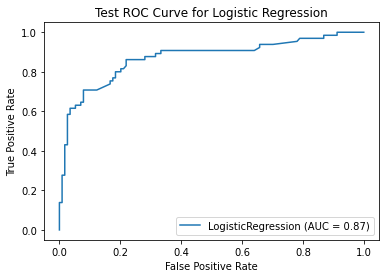

In [27]:
#Import the ROC curve function from scikit-learn
from sklearn.metrics import plot_roc_curve

#Plot the ROC curve using matplotlib
import matplotlib.pyplot as plt
plot_roc_curve(lr, features_test, output_test)
plt.title('Test ROC Curve for Logistic Regression')
plt.show()

Using scikit-learn and matplotlib, plot the ROC curves for the test data predictions from the Decision Tree and KNN models.  Which model has the highest AUC value?

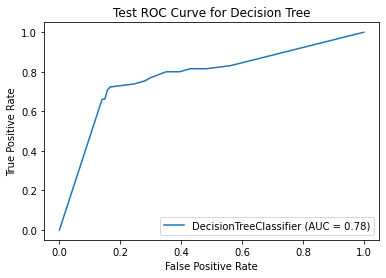

In [28]:
#Plot the ROC curve using matplotlib for the Decision Tree model
plot_roc_curve(tree, features_test, output_test)
plt.title('Test ROC Curve for Decision Tree')
plt.show()

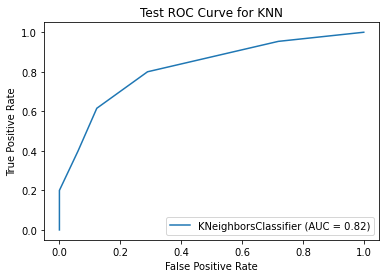

In [29]:
#Plot the ROC curve using matplotlib for the KNN model
plot_roc_curve(knn, features_test, output_test)
plt.title('Test ROC Curve for KNN')
plt.show()

## Further Practice
Each of the models built above have [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) or variables that can be adjusted to change the way the model makes its predictions.  Your models used the default settings within scikit-learn.

You can now go back and adjust these hyperparameters to see how they affect the evaulation of your model (see the [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html) documentation for more details).

## Further Reading
There are many other methodologies for building binary classification models.  Below are some links to further explore these types of models:
* https://medium.com/fuzz/machine-learning-classification-models-3040f71e2529
* https://towardsdatascience.com/solving-a-simple-classification-problem-with-python-fruits-lovers-edition-d20ab6b071d2

There are also other metrics you can use to evaluate classification models.  Below are additional links to other evaluation metrics.  The exact evaluation metric to use depends on your priorities.
* [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
* [Sensitivity and Specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)
* [Lift Curves](https://towardsdatascience.com/the-lift-curve-unveiled-998851147871)